In [3]:
import os
import pandas as pd
df = pd.read_json(os.path.join("data", "filmy.json"))
persony = pd.read_json(os.path.join("data", "persony.json"))

In [2]:
rezie = df[["Film","Copyright","Režie"]]

In [3]:
rezie = rezie.explode("Režie")

In [4]:
rezie = rezie.merge(persony, left_on = "Režie", right_on = "Jméno")

In [5]:
rezie

,Film,Copyright,Režie,Jméno,Medailon,Alternativní jména,Životopis,Datum narození,Místo narození,Datum úmrtí,Místo úmrtí,Město narození,Stát narození,Město úmrtí,Stát úmrtí,Rok narození,Rok úmrtí
0,Polední výstřel na Mariánských hradbách (401709),1898,Jan Kříženecký (127419),Jan Kříženecký (127419),"kameraman, fotograf, výrobce, režisér",Jan Nepomuk Josef Norbert Křiženecký (rodné jm...,JAN KŘÍŽENECKÝ (vl. jm. Jan Nepomuk Josef Norb...,-3212006400000,"Praha, Rakousko-Uhersko",-1542931200000,"Praha, Československo",Praha,Rakousko-Uhersko,Československo,Československo,1868.0,1921.0
1,Cvičení s kužely Sokolů malostranských (401704),1898,Jan Kříženecký (127419),Jan Kříženecký (127419),"kameraman, fotograf, výrobce, režisér",Jan Nepomuk Josef Norbert Křiženecký (rodné jm...,JAN KŘÍŽENECKÝ (vl. jm. Jan Nepomuk Josef Norb...,-3212006400000,"Praha, Rakousko-Uhersko",-1542931200000,"Praha, Československo",Praha,Rakousko-Uhersko,Československo,Československo,1868.0,1921.0
2,Cyklisté (401705),1898,Jan Kříženecký (127419),Jan Kříženecký (127419),"kameraman, fotograf, výrobce, režisér",Jan Nepomuk Josef Norbert Křiženecký (rodné jm...,JAN KŘÍŽENECKÝ (vl. jm. Jan Nepomuk Josef Norb...,-3212006400000,"Praha, Rakousko-Uhersko",-1542931200000,"Praha, Československo",Praha,Rakousko-Uhersko,Československo,Československo,1868.0,1921.0
3,Defilování vojska o Božím těle na Královských ...,1898,Jan Kříženecký (127419),Jan Kříženecký (127419),"kameraman, fotograf, výrobce, režisér",Jan Nepomuk Josef Norbert Křiženecký (rodné jm...,JAN KŘÍŽENECKÝ (vl. jm. Jan Nepomuk Josef Norb...,-3212006400000,"Praha, Rakousko-Uhersko",-1542931200000,"Praha, Československo",Praha,Rakousko-Uhersko,Československo,Československo,1868.0,1921.0
4,Hanácké banderium (401707),1898,Jan Kříženecký (127419),Jan Kříženecký (127419),"kameraman, fotograf, výrobce, režisér",Jan Nepomuk Josef Norbert Křiženecký (rodné jm...,JAN KŘÍŽENECKÝ (vl. jm. Jan Nepomuk Josef Norb...,-3212006400000,"Praha, Rakousko-Uhersko",-1542931200000,"Praha, Československo",Praha,Rakousko-Uhersko,Československo,Československo,1868.0,1921.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5083,Okupace (402157),2021,Michal Nohejl (1973),Michal Nohejl (1973),"scenárista, režisér","duo Mods, The Mods",None,168134400000,None,None,None,None,None,None,None,1975.0,NaN
5084,Budiž voda! (402151),2021,Karel Žalud (5850),Karel Žalud (5850),"scenárista, dokumentarista, režisér",None,None,35856000000,"Hradec Králové, Československo",None,None,Hradec Králové,Československo,None,None,1971.0,NaN
5085,Ubal a zmiz (402138),2021,Adam Hobzík (77829),Adam Hobzík (77829),None,None,None,1985,None,None,None,None,None,None,None,1985.0,NaN
5086,Planeta Praha (402218),2022,Jan Hošek (5629),Jan Hošek (5629),"scenárista, ilustrátor, dokumentarista, režisér",None,None,-280108800000,"Praha, Československo",None,None,Praha,Československo,None,None,1961.0,NaN


In [6]:
rezie["Věk"] = rezie["Copyright"] - rezie["Rok narození"]

<AxesSubplot:xlabel='Copyright'>

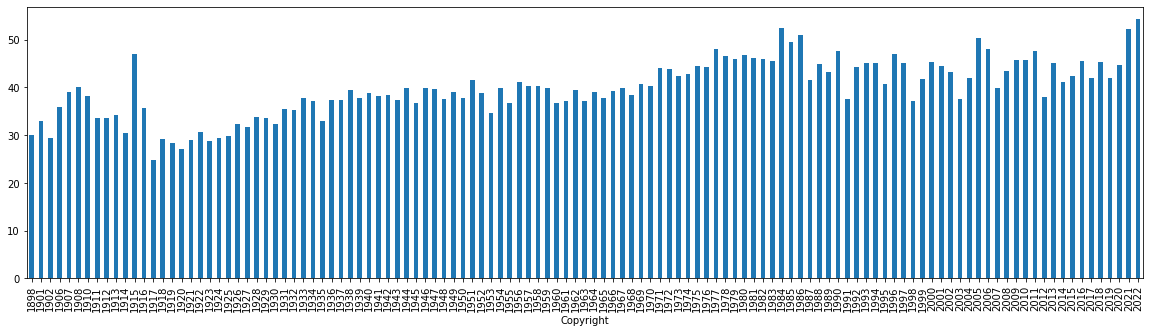

In [7]:
rezie.groupby("Copyright")["Věk"].mean().plot.bar(figsize=(20,5))

<AxesSubplot:xlabel='Copyright'>

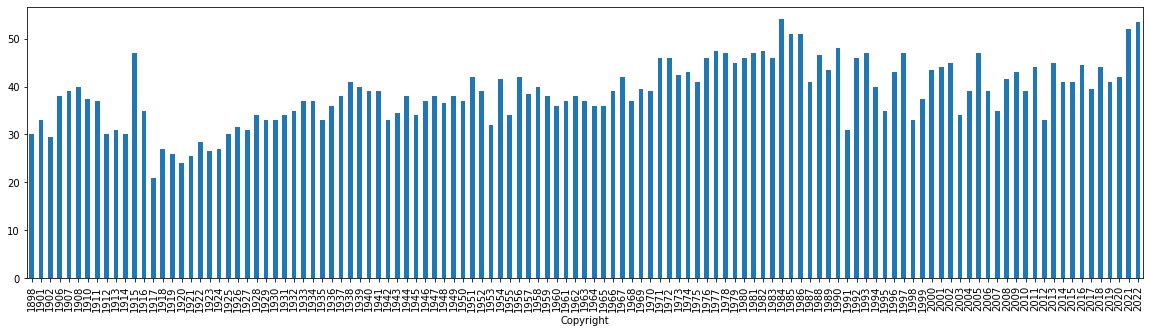

In [8]:
rezie.groupby("Copyright")["Věk"].median().plot.bar(figsize=(20,5))

In [9]:
scenar = df[["Film","Copyright","Scénář"]]

In [10]:
scenar = scenar.explode("Scénář")

In [11]:
scenar = scenar.merge(persony, left_on = "Scénář", right_on = "Jméno")

In [12]:
def nejnizsi_vek(sloupec):
    pracovni_df = df[["Film","Copyright",sloupec]]
    pracovni_df = pracovni_df.explode(sloupec)
    pracovni_df = pracovni_df.merge(persony, left_on = sloupec, right_on = "Jméno")
    pracovni_df["Věk"] = pracovni_df["Copyright"] - pracovni_df["Rok narození"]
    pracovni_df.groupby("Copyright")["Věk"].min().plot.bar(figsize=(20,5))

In [13]:
def prumerny_vek(sloupec):
    pracovni_df = df[["Film","Copyright",sloupec]]
    pracovni_df = pracovni_df.explode(sloupec)
    pracovni_df = pracovni_df.merge(persony, left_on = sloupec, right_on = "Jméno")
    pracovni_df["Věk"] = pracovni_df["Copyright"] - pracovni_df["Rok narození"]
    pracovni_df.groupby("Copyright")["Věk"].mean().plot.bar(figsize=(20,5))

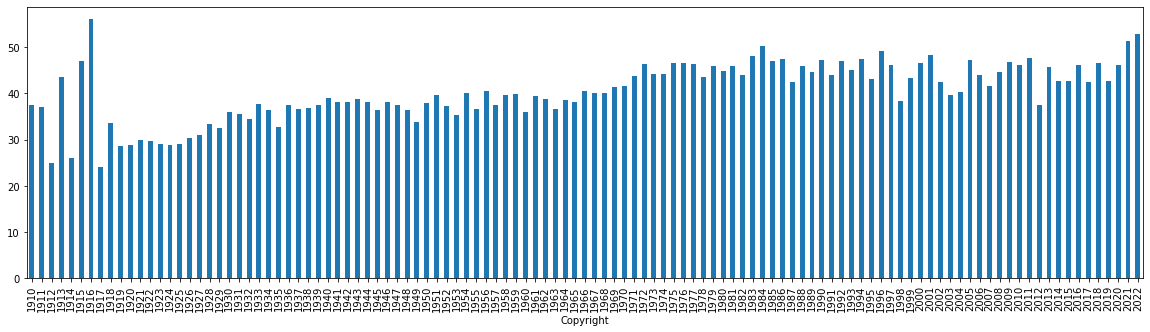

In [14]:
prumerny_vek("Scénář")

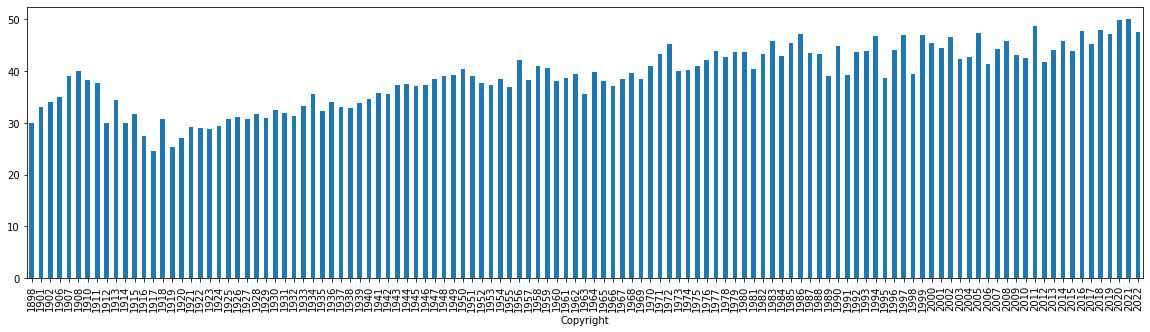

In [15]:
prumerny_vek("Kamera")

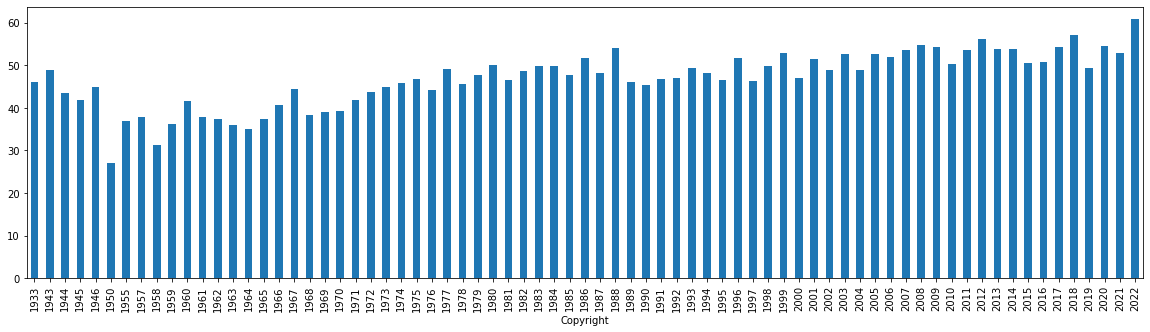

In [16]:
prumerny_vek("Dramaturg")

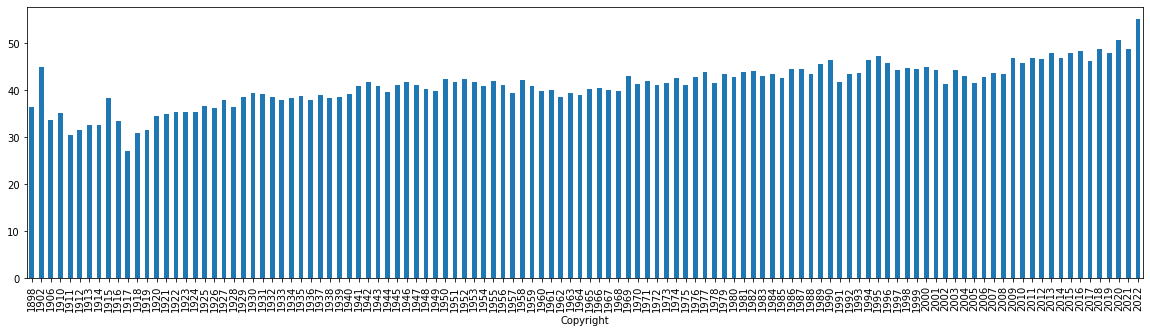

In [17]:
prumerny_vek("Hrají")

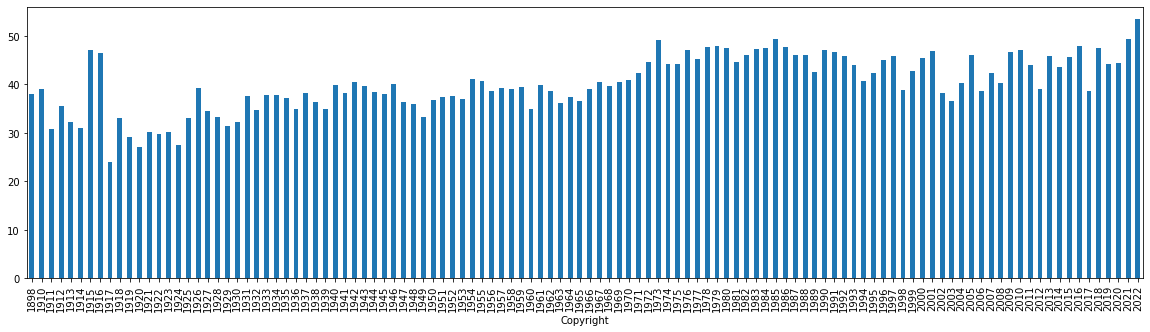

In [18]:
prumerny_vek("Původní filmový námět")

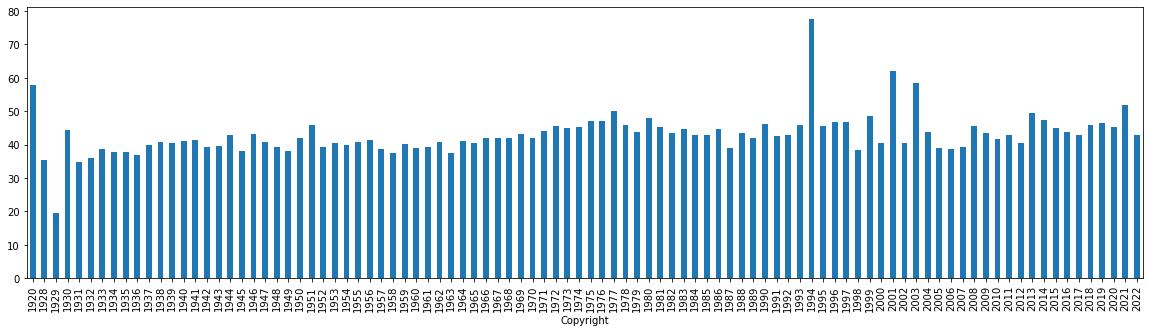

In [19]:
prumerny_vek("Hudba")

In [25]:
profese = [
    "Animace",
    "Architekt",
    "Asistent kamery",
    "Asistent režie",
    "Autor komentáře",
    "Dramaturg",
    "Druhá kamera",
    "Hrají",
    "Hudba",
    "Choreografie",
    "Kamera",
    "Kaskadéři",
    "Koordinátor kaskadérů",
    "Koproducent",
    "Masky",
    "Návrhy kostýmů",
    "Návrhy titulků",
    "Odborný poradce",
    "Pedagogické vedení",
    "Pomocná režie",
    "Postprodukce",
    "Producent",
    "Produkce",
    "Předloha",
    "Původní filmový námět",
    "Režie",
    "Scénář",
    "Spolupráce",
    "Střih",
    "Technický scénář",
    "Vedoucí produkce",
    "Vedoucí výroby",
    "Výprava",
    "Výkonná produkce",
    "Výtvarná spolupráce",
    "Výtvarník",
    "Zástupce vedoucího produkce",
    "Zástupce vedoucího výroby",
    "Zpívá"]

In [21]:
def spoj(x):
    seznam = []
    if isinstance(x, str):
        if x.strip() not in seznam:
            seznam.append(x.strip())
    if isinstance(x, list):
        for y in x:
            if isinstance(y, str):
                if y.strip() not in seznam:
                    seznam.append(y.strip())
    return(seznam)

In [22]:
def spoj2(x):
    seznam = []
    for y in x:
        for z in y:
            if z not in seznam:
                seznam.append(z)
    return(seznam)

In [23]:
df["Lidé"] = df[profese].apply(lambda x: [spoj(x) for x in x.values], axis=1).apply(lambda x: spoj2(x))

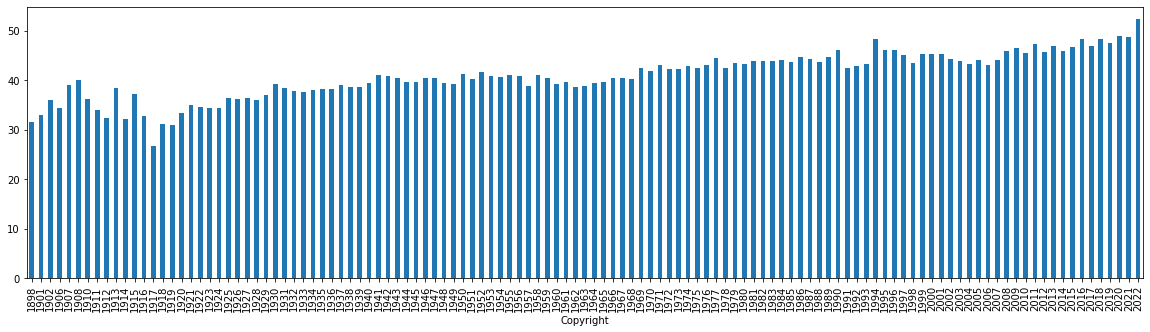

In [24]:
prumerny_vek("Lidé")

In [25]:
def stredni_vek(sloupec):
    pracovni_df = df[["Film","Copyright",sloupec]]
    pracovni_df = pracovni_df.explode(sloupec)
    pracovni_df = pracovni_df.merge(persony, left_on = sloupec, right_on = "Jméno")
    pracovni_df["Věk"] = pracovni_df["Copyright"] - pracovni_df["Rok narození"]
    pracovni_df.groupby("Copyright")["Věk"].median().plot.bar(figsize=(20,5))

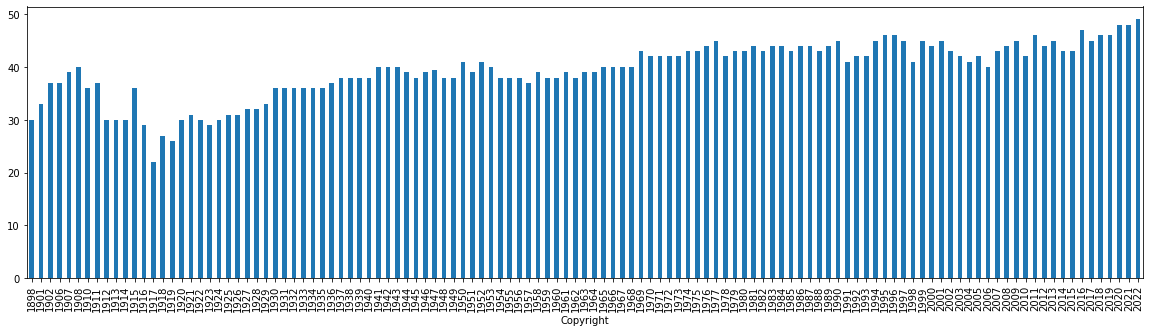

In [26]:
stredni_vek("Lidé")

In [27]:
lide = df[["Copyright","Film","Lidé"]]

In [28]:
lide = lide.explode("Lidé")

In [29]:
lide = lide.merge(persony, left_on = "Lidé", right_on = "Jméno")

In [30]:
lide

,Copyright,Film,Lidé,Jméno,Medailon,Alternativní jména,Životopis,Datum narození,Místo narození,Datum úmrtí,Místo úmrtí,Město narození,Stát narození,Město úmrtí,Stát úmrtí,Rok narození,Rok úmrtí
0,1898,Polední výstřel na Mariánských hradbách (401709),Jan Kříženecký (127419),Jan Kříženecký (127419),"kameraman, fotograf, výrobce, režisér",Jan Nepomuk Josef Norbert Křiženecký (rodné jm...,JAN KŘÍŽENECKÝ (vl. jm. Jan Nepomuk Josef Norb...,-3212006400000,"Praha, Rakousko-Uhersko",-1542931200000,"Praha, Československo",Praha,Rakousko-Uhersko,Československo,Československo,1868.0,1921.0
1,1898,Cvičení s kužely Sokolů malostranských (401704),Jan Kříženecký (127419),Jan Kříženecký (127419),"kameraman, fotograf, výrobce, režisér",Jan Nepomuk Josef Norbert Křiženecký (rodné jm...,JAN KŘÍŽENECKÝ (vl. jm. Jan Nepomuk Josef Norb...,-3212006400000,"Praha, Rakousko-Uhersko",-1542931200000,"Praha, Československo",Praha,Rakousko-Uhersko,Československo,Československo,1868.0,1921.0
2,1898,Cyklisté (401705),Jan Kříženecký (127419),Jan Kříženecký (127419),"kameraman, fotograf, výrobce, režisér",Jan Nepomuk Josef Norbert Křiženecký (rodné jm...,JAN KŘÍŽENECKÝ (vl. jm. Jan Nepomuk Josef Norb...,-3212006400000,"Praha, Rakousko-Uhersko",-1542931200000,"Praha, Československo",Praha,Rakousko-Uhersko,Československo,Československo,1868.0,1921.0
3,1898,Defilování vojska o Božím těle na Královských ...,Jan Kříženecký (127419),Jan Kříženecký (127419),"kameraman, fotograf, výrobce, režisér",Jan Nepomuk Josef Norbert Křiženecký (rodné jm...,JAN KŘÍŽENECKÝ (vl. jm. Jan Nepomuk Josef Norb...,-3212006400000,"Praha, Rakousko-Uhersko",-1542931200000,"Praha, Československo",Praha,Rakousko-Uhersko,Československo,Československo,1868.0,1921.0
4,1898,Hanácké banderium (401707),Jan Kříženecký (127419),Jan Kříženecký (127419),"kameraman, fotograf, výrobce, režisér",Jan Nepomuk Josef Norbert Křiženecký (rodné jm...,JAN KŘÍŽENECKÝ (vl. jm. Jan Nepomuk Josef Norb...,-3212006400000,"Praha, Rakousko-Uhersko",-1542931200000,"Praha, Československo",Praha,Rakousko-Uhersko,Československo,Československo,1868.0,1921.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153178,2022,Mimořádná událost (402176),Jiří Altmann (78236),Jiří Altmann (78236),None,Jiří Altman (chybný tvar),None,-881280000000,"Praha, Československo",None,None,Praha,Československo,None,None,1942.0,NaN
153179,2022,Mimořádná událost (402176),Pavel Herzog (83309),Pavel Herzog (83309),,None,None,None,None,None,None,None,None,None,None,NaN,NaN
153180,2022,Planeta Praha (402218),Andran Abramjan (34673),Andran Abramjan (34673),None,None,None,475200000000,"Praha, Československo",None,None,Praha,Československo,None,None,1985.0,NaN
153181,2022,Planeta Praha (402218),Martin Frouz (30658),Martin Frouz (30658),,None,None,None,None,None,None,None,None,None,None,NaN,NaN


<AxesSubplot:xlabel='Copyright'>

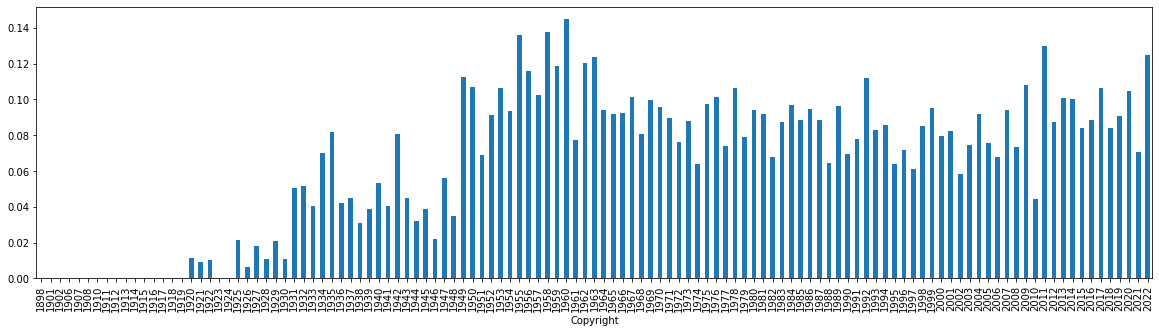

In [31]:
pd.Series(lide[lide["Město narození"] == "Brno"].groupby("Copyright")["Lidé"].nunique() / lide[lide["Město narození"] == "Praha"].groupby("Copyright")["Lidé"].nunique()).plot.bar(figsize=(20,5))

<AxesSubplot:xlabel='Copyright'>

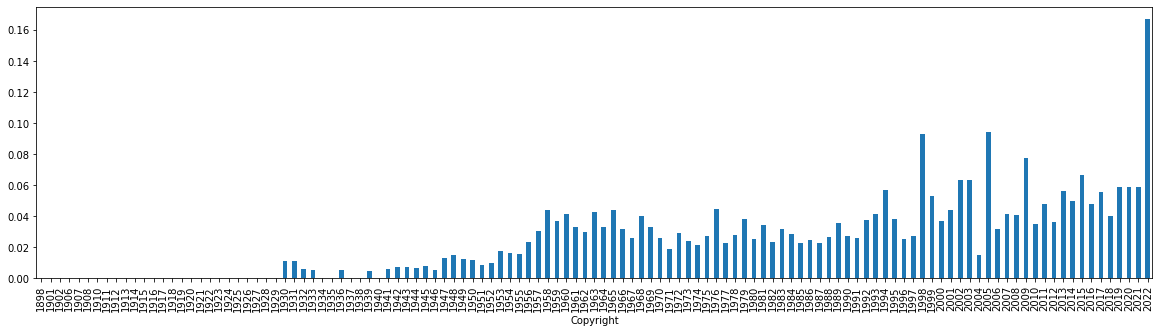

In [32]:
pd.Series(lide[lide["Město narození"] == "Ostrava"].groupby("Copyright")["Lidé"].nunique() / lide[lide["Město narození"] == "Praha"].groupby("Copyright")["Lidé"].nunique()).plot.bar(figsize=(20,5))

<AxesSubplot:xlabel='Copyright'>

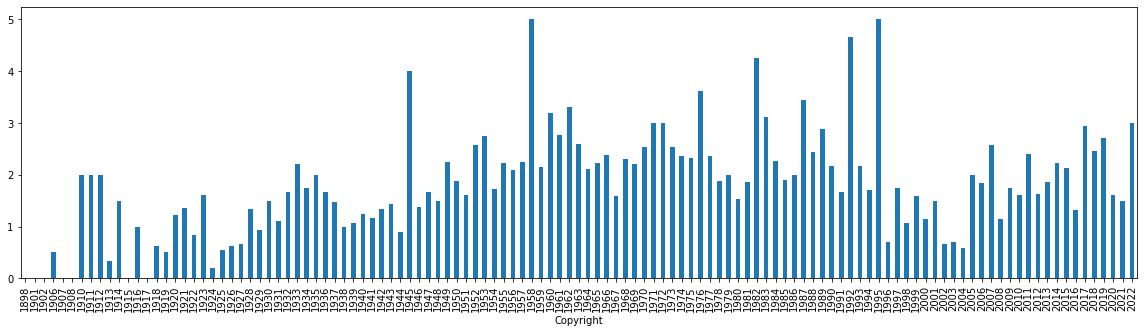

In [48]:
pd.Series(rezie[rezie["Město narození"] != "Praha"].groupby("Copyright")["Režie"].nunique() / rezie[rezie["Město narození"] == "Praha"].groupby("Copyright")["Režie"].nunique()).plot.bar(figsize=(20,5))

<AxesSubplot:xlabel='Copyright'>

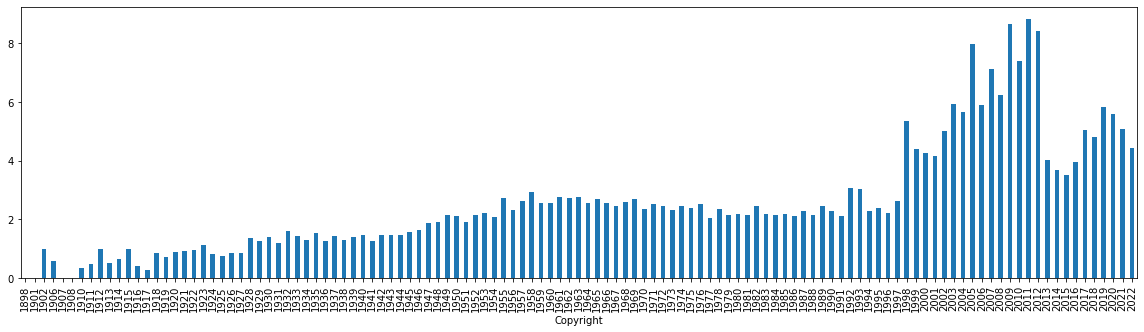

In [47]:
pd.Series(lide[lide["Město narození"] != "Praha"].groupby("Copyright")["Lidé"].nunique() / lide[lide["Město narození"] == "Praha"].groupby("Copyright")["Lidé"].nunique()).plot.bar(figsize=(20,5))

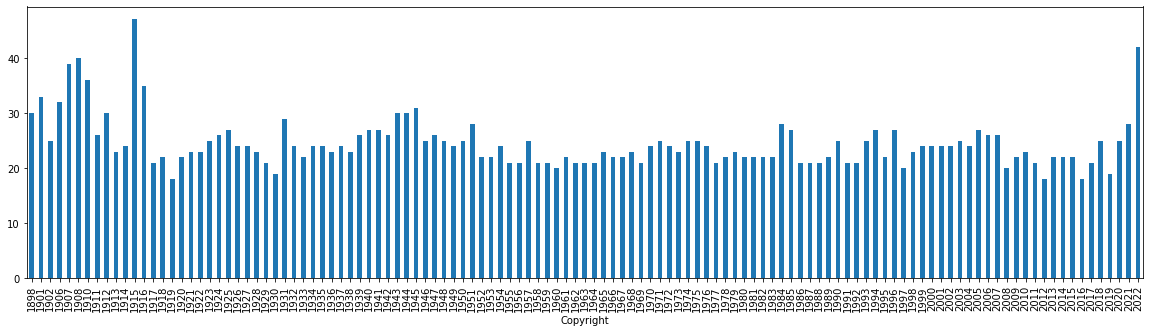

In [33]:
nejnizsi_vek("Režie")

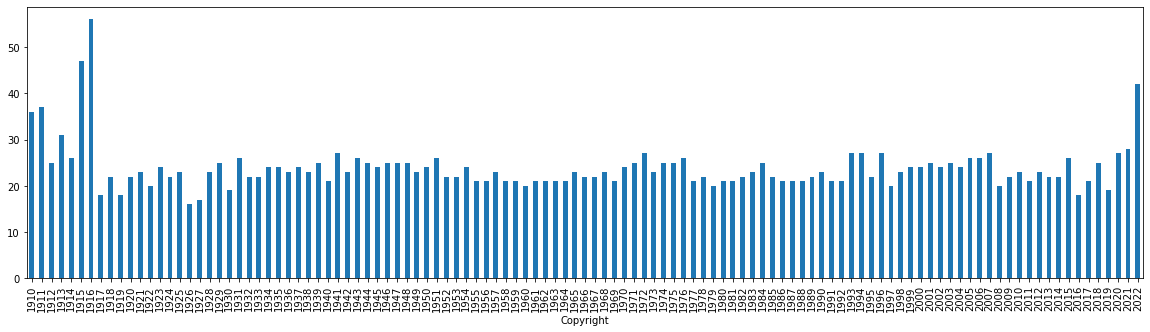

In [34]:
nejnizsi_vek("Scénář")

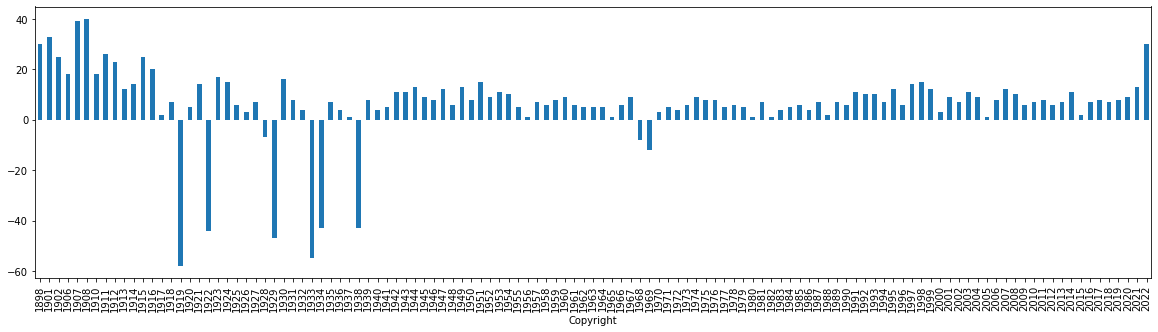

In [35]:
nejnizsi_vek("Lidé")

In [36]:
lide["Věk"] = lide["Copyright"] - lide["Rok narození"]

Bacha!!! Do průměrného věku se promítá věk extrémů jako Boccaccio.

In [37]:
lide.sort_values(by="Věk",ascending=True).head(20)

,Copyright,Film,Lidé,Jméno,Medailon,Alternativní jména,Životopis,Datum narození,Místo narození,Datum úmrtí,Místo úmrtí,Město narození,Stát narození,Město úmrtí,Stát úmrtí,Rok narození,Rok úmrtí,Věk
6196,1919,Krasavice Kaťa (395189),Alexandr Sergejevič Puškin (129209),Alexandr Sergejevič Puškin (129209),"dramatik, spisovatel, básník, prozaik",None,None,234403200000,"Moskva, Ruská říše",-4193596800000,"Petrohrad, Ruská říše",Moskva,Ruská říše,Ruská říše,Ruská říše,1977.0,1837.0,-58.0
26947,1933,Revizor (395610),Bohumil Mathesius (25508),Bohumil Mathesius (25508),"překladatel, básník, publicista",None,None,584841600000,"Praha, Rakousko-Uhersko",-554860800000,"Praha, Československo",Praha,Rakousko-Uhersko,Československo,Československo,1988.0,1952.0,-55.0
18083,1929,Takový je život (395489),Jan Burian ml. (78511),Jan Burian ml. (78511),None,None,None,199238400000,"Praha, Československo",None,None,Praha,Československo,None,None,1976.0,NaN,-47.0
11614,1922,Babinský (395277),Ladislav Pech (131498),Ladislav Pech (131498),"herec, divadelní režisér",None,None,-100915200000,"Praha, Rakouské císařství",-867456000000,"Brno, Československo",Praha,Rakouské císařství,Československo,Československo,1966.0,1942.0,-44.0
6197,1934,Volha v plamenech (395662),Alexandr Sergejevič Puškin (129209),Alexandr Sergejevič Puškin (129209),"dramatik, spisovatel, básník, prozaik",None,None,234403200000,"Moskva, Ruská říše",-4193596800000,"Petrohrad, Ruská říše",Moskva,Ruská říše,Ruská říše,Ruská říše,1977.0,1837.0,-43.0
33426,1938,Soud boží (395816),Jiří Hora (129312),Jiří Hora (129312),"dramatik, redaktor, publicista, právník",None,None,1981,None,1912,None,None,None,None,None,1981.0,1912.0,-43.0
90244,1969,Touha zvaná Anada (396814),Lájos Zilahy (126310),Lájos Zilahy (126310),spisovatel,None,None,354499200000,None,155088000000,None,None,None,None,None,1981.0,1974.0,-12.0
87439,1968,Na Žižkově válečném voze (396770),Josef František Karas (11098),Josef František Karas (11098),spisovatel,None,None,218505600000,"Tišnov, Rakousko-Uhersko",-1226534400000,"Dluhovice u Přerova, Československo",Tišnov,Rakousko-Uhersko,Československo,Československo,1976.0,1931.0,-8.0
17319,1928,Mlynář a jeho dítě (395440),Ernst Raupach (129251),Ernst Raupach (129251),None,None,None,1935,None,1862,None,None,None,None,None,1935.0,1862.0,-7.0
17712,1929,Erotikon (395498),Jan Klusák (8564),Jan Klusák (8564),"herec, spisovatel, dirigent, hudební skladatel...",Jan Filip Porges (rodné jméno),None,-1126828800000,"Praha, Československo",None,None,Praha,Československo,None,None,1934.0,NaN,-5.0


In [42]:
def vek_scatter(sloupec):
    pracovni_df = df[["Film","Copyright",sloupec]]
    pracovni_df = pracovni_df.explode(sloupec)
    pracovni_df = pracovni_df.merge(persony, left_on = sloupec, right_on = "Jméno")
    pracovni_df["Věk"] = pracovni_df["Copyright"] - pracovni_df["Rok narození"]
    pracovni_df.plot.scatter(x = "Copyright", y = "Věk", figsize=(20,5))

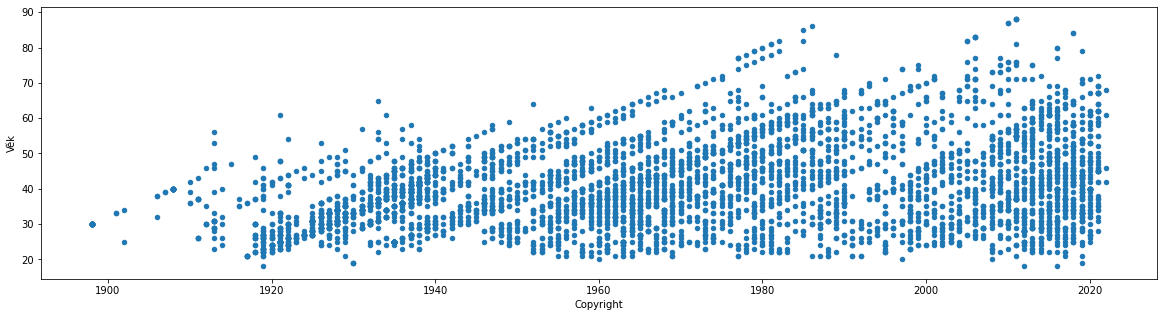

In [43]:
vek_scatter("Režie")

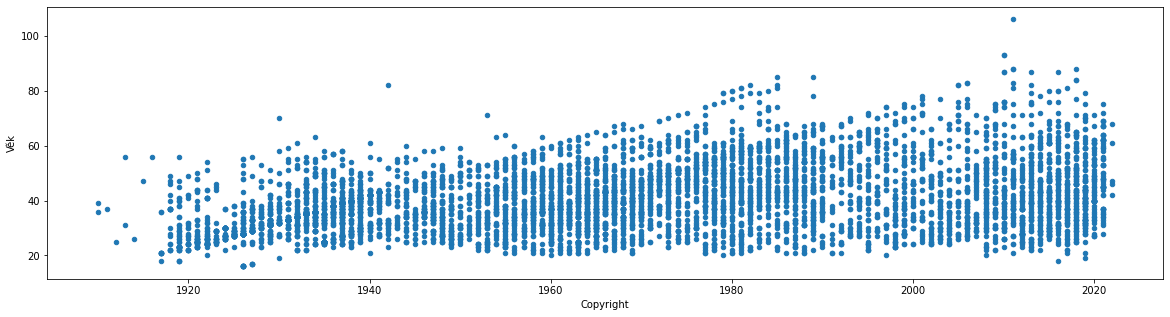

In [44]:
vek_scatter("Scénář")

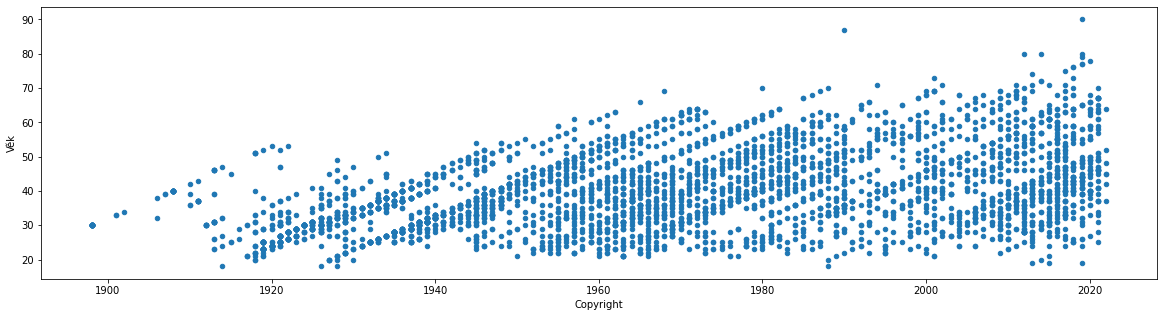

In [45]:
vek_scatter("Kamera")

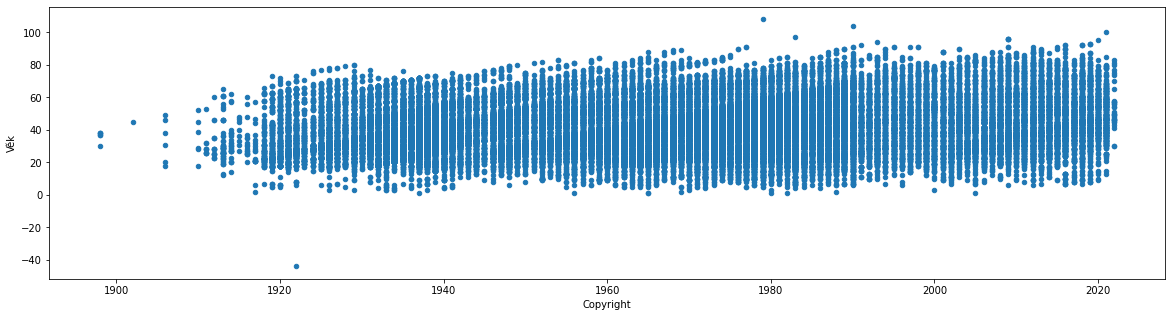

In [49]:
vek_scatter("Hrají")

## Pokus najít staré a mladé profese

In [26]:
porevoluci = df[df["Copyright"] >= 1993]

In [27]:
ponechat = profese
ponechat.append("Copyright")

In [29]:
porevoluci = porevoluci[ponechat]

In [61]:
def vek(rok, narozeni, smrt):
    try:
        if smrt:
            if smrt < rok:
                vek = None
        else:
            vek = rok - narozeni
    except:
        vek = None
    return int(vek)

In [70]:
profese_vek = {}
for col in porevoluci.columns:
    if col == "Copyright":
        pass
    else:
        pracovni = porevoluci.explode(col)
        pracovni = pracovni[["Copyright", col]]
        pracovni = pracovni.merge(persony, left_on = col, right_on = "Jméno")
        pracovni = pracovni[(pracovni["Copyright"] < pracovni["Rok úmrtí"]) | pracovni["Rok úmrtí"].isnull()]
        pracovni["Věk"] = pracovni["Copyright"] - pracovni["Rok narození"]
        prumer = pracovni["Věk"].mean()
        median = pracovni["Věk"].median()
        nejvic = pracovni["Věk"].max()
        nejmin = pracovni["Věk"].min()
        profese_vek[col] = [prumer, median, nejmin, nejvic]
profese_vek = pd.DataFrame.from_dict(profese_vek, columns=["Průměr","Medián","Nejmíň","Nejvíc"], orient="index")

In [71]:
profese_vek.sort_values(by="Medián", ascending=True)

,Průměr,Medián,Nejmíň,Nejvíc
Zástupce vedoucího výroby,34.129412,31.0,20.0,63.0
Asistent režie,33.191111,31.0,20.0,62.0
Animace,39.014981,35.0,15.0,76.0
Výtvarná spolupráce,39.478261,37.0,21.0,70.0
Pomocná režie,38.552941,37.0,20.0,65.0
Návrhy titulků,40.452830,38.0,20.0,79.0
Druhá kamera,41.362676,39.0,23.0,75.0
Vedoucí výroby,40.244526,39.0,20.0,65.0
Asistent kamery,41.445070,39.0,18.0,78.0
Zpívá,45.231660,40.0,6.0,86.0
